In [199]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [339]:
df.dtypes

index         int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Exploratory data analysis

#### Data composition

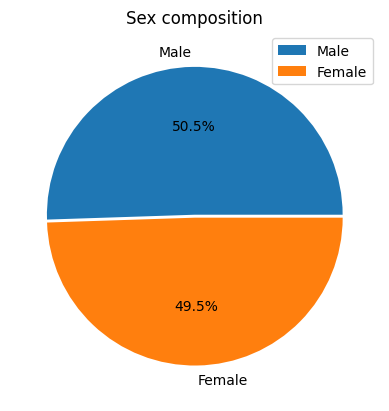

In [3]:
female=df.loc[df['sex']=='female'].count()[0]
male=df.loc[df['sex']=='male'].count()[0]
pieData=[male,female]
plt.pie(pieData,autopct='%1.1f%%',labels=['Male','Female'],explode=[0.01,0.01])
plt.title('Sex composition')
plt.legend()
plt.show()

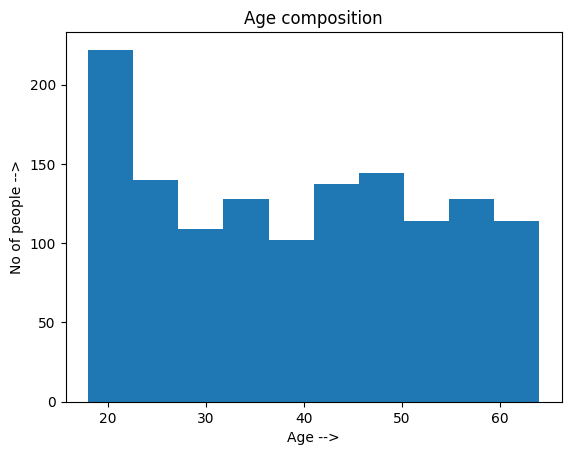

In [4]:
plt.hist(df['age'])
plt.xlabel('Age -->')
plt.ylabel('No of people -->')
plt.title('Age composition')
plt.show()

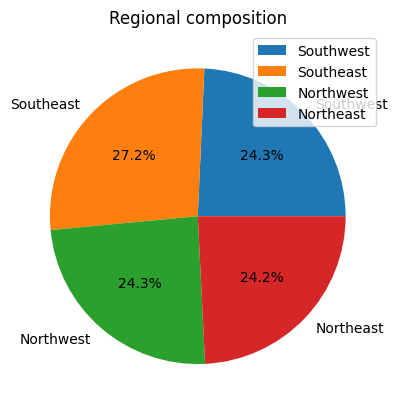

In [5]:
sw = df[df['region']=='southwest'].count()[0]
se = df[df['region']=='southeast'].count()[0]
nw = df[df['region']=='northwest'].count()[0]
ne = df[df['region']=='northeast'].count()[0]
regionData=[sw,se,nw,ne]
regionLabel=['Southwest','Southeast','Northwest','Northeast']
plt.pie(regionData,autopct="%1.1f%%",labels=regionLabel)
plt.legend()
plt.title('Regional composition')
plt.show()

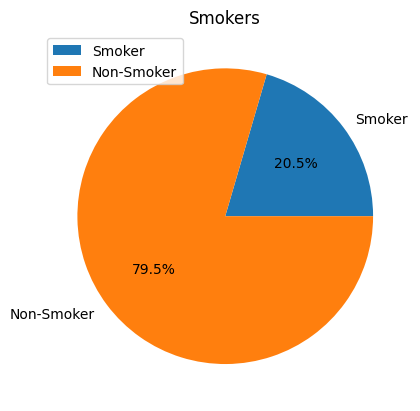

In [6]:
smokers=df[df['smoker']=='yes'].count()[0]
nonSmokers=df[df['smoker']=='no'].count()[0]
plt.pie([smokers,nonSmokers],autopct='%1.1f%%',labels=['Smoker','Non-Smoker'])
plt.legend()
plt.title('Smokers')
plt.show()

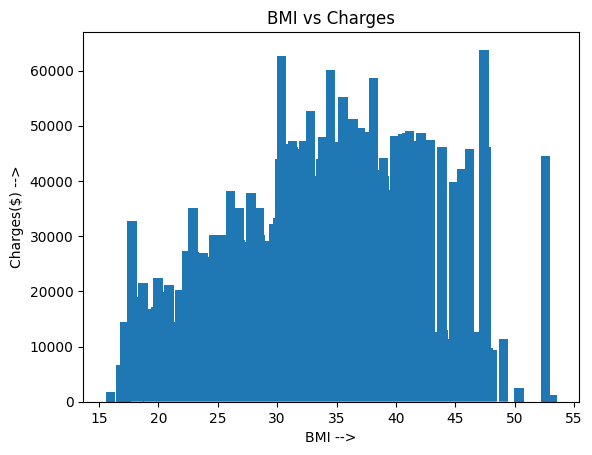

In [28]:
plt.bar(df['bmi'],df['charges'])
plt.xlabel('BMI -->')
plt.ylabel('Charges($) -->')
plt.title('BMI vs Charges')
plt.show()

In [333]:
smokerFrame=df[df['smoker']=='yes']
nonSmokerFrame=df[df['smoker']=='no']
diff=((smokerFrame['charges'].mean()-df['charges'].mean())/df['charges'].mean()-1)
print("Difference between smoker charges and average: +{:.2f}%".format(diff*100))
diff2=((smokerFrame['charges'].mean()-nonSmokerFrame['charges'].mean())/smokerFrame['charges'].mean())
print(("Difference between smoker charges and non-smoker charges: +{:.2f}%".format(diff2*100)))

Difference between smoker charges and average: +41.52%
Difference between smoker charges and non-smoker charges: +73.68%


In [331]:
female=df[df['sex']=='female']
male=df[df['sex']=='male']
mf=(male['charges'].mean()-female['charges'].mean())/male['charges'].mean()*100
print("Difference in average charges between female and male customers: +{:.2f}%".format(mf))

Difference in average charges between female and male customers: +9.94%


In [330]:
southWestMean=df[df['region']=='southwest']['charges'].mean()
southEastMean=df[df['region']=='southeast']['charges'].mean()
northWestMean=df[df['region']=='northwest']['charges'].mean()
northEastMean=df[df['region']=='northeast']['charges'].mean()

charges={southWestMean:'Southwest',southEastMean:'Southeast',northWestMean:'Northwest',northEastMean:'Northeast'}

charge_list=charges.keys()

charge_max=max(charges.keys())

highestRegion=max(charge_list)  

print("Region with the highest average fees: ",charges.get(highestRegion),
      "\nSoutheast average: ${:,.2f}".format(charge_max),
      "\nNortheast average: ${:,.2f}".format(northEastMean),
      "\nNorthwest average: ${:,.2f}".format(northWestMean),
      "\nSouthwest average: ${:,.2f}".format(southWestMean),
      )

Region with the highest average fees:  Southeast 
Southeast average: $14,735.41 
Northeast average: $13,406.38 
Northwest average: $12,417.58 
Southwest average: $12,346.94


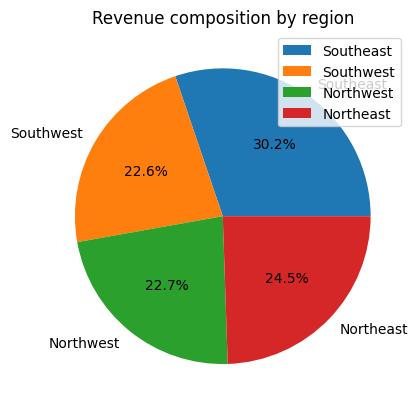

In [253]:
SE_Pie=df[df['region']=='southeast']['charges'].sum()
SW_Pie=df[df['region']=='southwest']['charges'].sum()
NW_Pie=df[df['region']=='northwest']['charges'].sum()
NE_Pie=df[df['region']=='northeast']['charges'].sum()
region_pie=[SE_Pie,SW_Pie,NW_Pie,NE_Pie]
plt.pie(region_pie,autopct='%1.1f%%',labels=['Southeast','Southwest','Northwest','Northeast'])
plt.legend()
plt.title('Revenue composition by region')
plt.show()

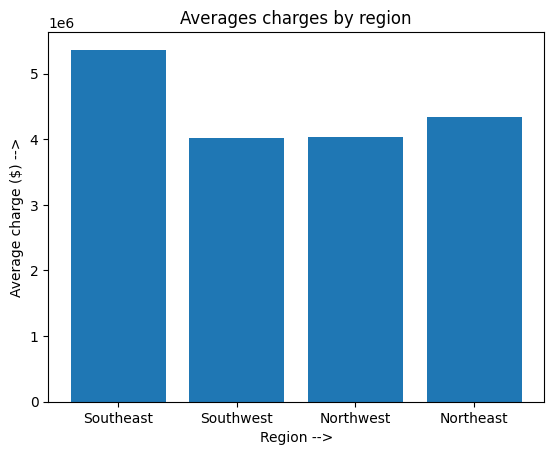

In [409]:
plt.bar(['Southeast','Southwest','Northwest','Northeast'],region_pie)
plt.xlabel('Region -->')
plt.ylabel('Average charge ($) -->')
plt.title('Averages charges by region')
plt.show()

In [329]:
customers_with_children=(df[df['children']>0]['charges'].mean()/df[df['children']==0]['charges'].mean()-1)*100
print("Average charges for customers without children: ${:,.2f}".format(df[df['children']==0]['charges'].mean()),
      "\nAverage charges for customers with children: ${:,.2f}".format(df[df['children']>0]['charges'].mean()),
      "\nDifference in average charges for customers with children: +{:.2f}%".format(customers_with_children))

Average charges for customers without children: $12,365.98 
Average charges for customers with children: $13,949.94 
Difference in average charges for customers with children: +12.81%


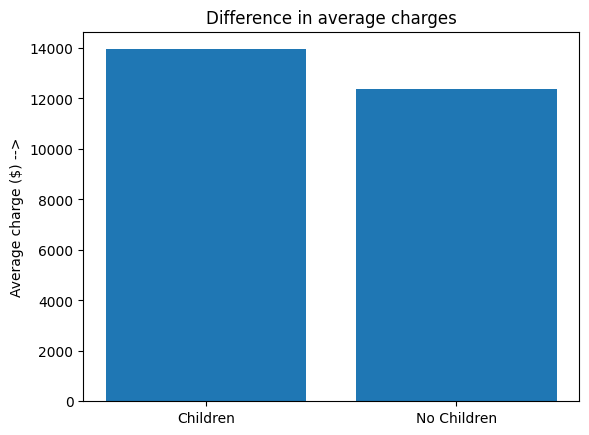

In [422]:
children=df[df['children']>0]['charges'].mean()
no_children=df[df['children']==0]['charges'].mean()
plt.bar(['Children','No Children'],[children,no_children])
plt.ylabel('Average charge ($) -->')
plt.title('Difference in average charges')
plt.show()

In [429]:
average_parent_age=df[df['children']>0]['age'].mean()
mode_parent_age=df[df['children']>0]['age'].mode()[0]
average_nonparent_age=df[df['children']==0]['age'].mean()
print("Average age of customers with 1 or more children: {:.2f} years".format(average_parent_age),
      "\nAverage age of customers without children: {:.2f} years".format(average_nonparent_age),
      "\nMode age of customers with 1 or more children: {:.2f} years".format(mode_parent_age))

Average age of customers with 1 or more children: 39.78 years 
Average age of customers without children: 38.44 years 
Mode age of customers with 1 or more children: 47.00 years


In [430]:
import seaborn as sns

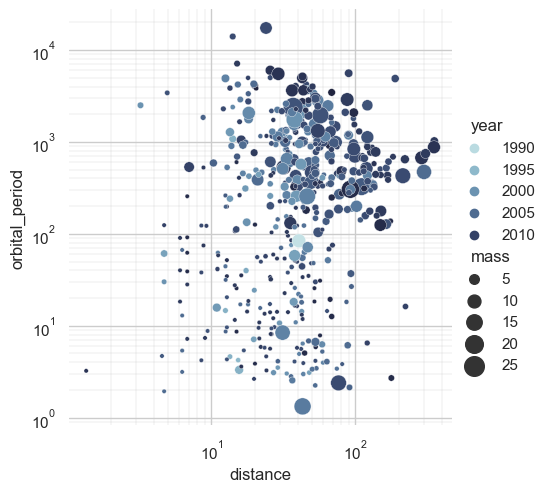

In [435]:
sns.set_theme(style="whitegrid")
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)